# 딥러닝 구조 연습4-이미지

* 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류하는 것입니다. 

In [ ]:
# 어제까지 목표는 10개의 클래스별로 분류. 대상은 이미지 파일. 
# -mnist(딥러닝 DNN+옵티마이저+드롭아웃으로 에포크최적치찾음)

In [ ]:
# https://velog.io/@tmddn0311/mnist-classification

## 라이브러리 로드

In [1]:
import numpy as np
from keras.datasets import mnist
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 데이터 로드

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# X_train, y_train # X_test, y_test를 이름 다르게 설정한 것.

In [3]:
# 차원확인 : 훈련용
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
# 차원확인 : 검증용
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [16]:
train_images.ndim

3

In [11]:
# 클래스 몇개인지
train_labels # 데이터가 정수 라벨 인코딩이 진행된 상태

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
import numpy as np

np.unique(train_labels) # 0~9까지 라벨링되어있구나

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
np.unique(train_labels, return_counts=True) # 클래스의 값과 해당 개수를 보여줌 
# 데이터 개수의 차이가 꽤 크다. 5(5421개)는 상대적으로 덜 학습. 1(6742개)는 상대적으로 많이 학습
# 약간의 불균형이 존재

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [15]:
np.unique(test_labels, return_counts=True)
# 레이블 또한 1이 상대적으로 많고, 5가 적다

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

## 데이터 준비

In [22]:
# 데이터 전처리까지 진행 : 정규화
train_scaled = train_images/255.0 # 0~1 사이의 수로 정규화
test_scaled = test_images/255.0 # 0~1 사이의 수로 정규화

# 정규화 이유: 모델은 단순한 정수를 처리하는것보다 0~1 사이의 실수를 처리할 때 더 좋은 성능을 보입니다. 
# 따라서 0~255의 픽셀값으로 이루어진 이미지에 255를 나눠준다

In [6]:
train_scaled.ndim # dnn에 넣으려면 픽셀하나가 들어가야하기에 한장의 축이 한줄의 벡터형태로 줄이 되어야하기에 reshape.

3

In [23]:
#3차원 배열인 각 샘플을 2차원으로 펼침

train_scaled = train_scaled.reshape(-1, 28*28) #3차원 -> 2차원
test_scaled = test_scaled.reshape(-1, 28*28)
train_scaled.ndim, test_scaled.ndim

# [참고]  flatten은 2차원 배열인 각 샘플을 1차원으로 펼침

(2, 2)

In [9]:
train_scaled.shape, train_labels.shape

((60000, 784), (60000,))

In [17]:
from tensorflow.keras.utils import to_categorical
# 라벨링이 원-핫 인코딩. 1차원 -> 2차원
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 현재의 모델은 2차원 데이터를 받아들이기 힘들기 때문에, 이를 1차원으로 쭉 펴줍니다 ??
# 원 핫 인코딩은 이와 같은 클래스 분류 문제나 자연어 처리 분야에서도 사용

In [19]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
test_labels.shape # 1차원 -> 2차원 : 원핫인코딩은 모델을 어떻게 인코딩할까용? 이 부분을 잘 알아보기

(10000, 10)

In [20]:
test_images.shape, 

((10000, 28, 28), (60000, 10))

## 딥러닝 구성하기

In [30]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_labels, y_val = train_test_split(train_scaled,  train_labels, test_size=0.2, random_state=42)


In [34]:
# 훈련데이터 (전처리 완료상태), 라벨(원핫인코딩이 적용된 상태)
from matplotlib import units
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(input_shape=(784,), units=100, activation="relu"))
model.add(Dense(10, activation="softmax")) # 출력층 : 다중분류
# 완전연결층 추가. 처음 쌓는 레이어는 input_shape: 데이터 차원(개수 제외)을 적어줘야함.
# 출력하는 완전연결층 추가. 다중분류이므로, softmax 활성화함수 사용

## 딥러닝 설정하기

In [35]:
#손실함수* 다중 분류: categorical_crossentropy (타깃값을 0,1로 이루어진 원-핫 인코딩으로 준비했다면)
#옵티마이저:경사하강법 종류
#평가방법* metrics:    * 분류: accuracy


# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') # 과대적합 방지: 옵티마이저 조정 

model.summary()  # 간단하게 요약해 출력

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ## 코랩을 사용할 때
# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [36]:
#베스트모델 저장
#save_best_only=True : 검증점수의 성능이 향상 되었을 때만 저장


#검증점수를 모니터링하여 더 이상 성능이 향상되지 않으면 조기종료
#5번 연속 검증점수가 향상되지 않으면 훈련 중지

from keras.callbacks import ModelCheckpoint,EarlyStopping

modelpath="./model/MNIST손글씨_dnn_model.hdf5"

checkpoint_dnn = ModelCheckpoint(modelpath,save_best_only=True) 
early_stopping = EarlyStopping(patience=5,restore_best_weights=True) # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림.




## 딥러닝 훈련하기

In [ ]:
#  verbose가 있으면 함수 수행시 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가를 나타냅니다. 
# 보통 0 은 출력하지 않고, 1은 자세히, 2는 함축적인 정보만 출력하는 형태로 되어 있습니다.

In [37]:
# 128개 샘플씩 미니 배치로 훈련 데이터 다섯 번 반복(batch_size=128)

history = model.fit(train_scaled, train_labels, epochs=20,  batch_size=128,verbose=1,
                    validation_data=(val_scaled, y_val),
                    callbacks=[checkpoint_dnn, early_stopping]) 



Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4089 - accuracy: 0.8891 - val_loss: 0.2324 - val_accuracy: 0.9367
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1967 - accuracy: 0.9450 - val_loss: 0.1728 - val_accuracy: 0.9513
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1477 - accuracy: 0.9580 - val_loss: 0.1435 - val_accuracy: 0.9598
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1174 - accuracy: 0.9668 - val_loss: 0.1243 - val_accuracy: 0.9634
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0964 - accuracy: 0.9726 - val_loss: 0.1190 - val_accuracy: 0.9636
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9765 - val_loss: 0.1041 - val_accuracy: 0.9678
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9802 - val_loss: 0.0988 - val_accuracy: 0.9710
Epoch 

In [38]:
 # 몇 번째 에포크에서 훈련이 중지 되었는지..
print(early_stopping.stopped_epoch)

19


## 평가하기

In [39]:
model.evaluate(val_scaled, y_val)

375/375 [==============================] - 0s 951us/step - loss: 0.0804 - accuracy: 0.9770


[0.08035822212696075, 0.9769999980926514]

테스트 세트의 정확도는 98.2%로 나왔습니다. 훈련 세트 정확도보다는 약간 낮습니다. 
약간의 과대적합이 보입니다. 

## 시각화하기

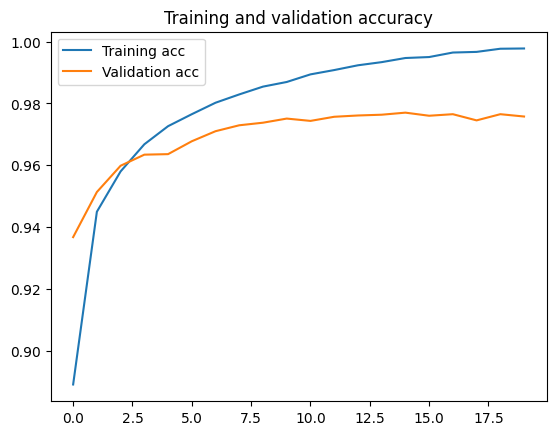

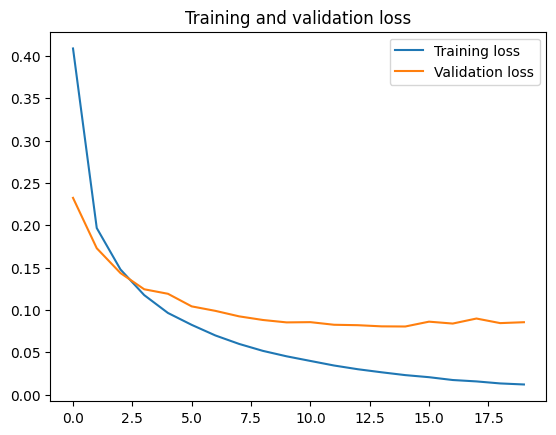

In [40]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 전체 코드

In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [ ]:
# 1. 라이브러리 로드

import numpy as np
from keras.datasets import mnist
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. 데이터 로드
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# X_train, y_train # X_test, y_test를 이름 다르게 설정한 것.

# 차원확인 : 훈련용 -> 3차원이미지 (train_images.ndim)
train_images.shape, train_labels.shape
# 차원확인 : 검증용
test_images.shape, test_labels.shape

# 클래스 몇개인지
train_labels # 데이터가 정수 라벨 인코딩이 진행된 상태
np.unique(train_labels, return_counts=True) # 클래스의 값과 해당 개수를 보여줌 
# 데이터 개수의 차이가 꽤 크다. 5(5421개)는 상대적으로 덜 학습. 1(6742개)는 상대적으로 많이 학습
# 약간의 불균형이 존재 -> 균형확인

#3. 데이터 준비
# 데이터 전처리 : 0~1 사이의 수로 정규화
train_scaled = train_images/255.0 
test_scaled = test_images/255.0 

train_scaled = train_scaled.reshape(-1, 28*28) #3차원 -> 2차원
test_scaled = test_scaled.reshape(-1, 28*28)
# train_scaled.shape, train_labels.shape # 2차원변경됨

# 라벨링이 원-핫 인코딩. 1차원 -> 2차원
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# test_labels.shape, train_labels.shape

#4. 딥러닝 구성하기
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_labels, y_val = train_test_split(train_scaled,  train_labels, test_size=0.2, random_state=42)

# 훈련데이터 (전처리 완료상태), 라벨(원핫인코딩이 적용된 상태)
from matplotlib import units
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(input_shape=(784,), units=100, activation="relu"))
model.add(Dense(10, activation="softmax")) # 출력층 : 다중분류-> softmax 활성화함수

#5. 딥러닝 설정하기

#손실함수* 다중 분류: categorical_crossentropy (타깃값을 0,1로 이루어진 원-핫 인코딩으로 준비했다면)
#옵티마이저:경사하강법 종류
#평가방법* metrics:    * 분류: accuracy

# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') # 과대적합 방지: 옵티마이저 조정 
# model.summary()  # 간단하게 요약해 출력

#베스트모델 저장
#save_best_only=True : 검증점수의 성능이 향상 되었을 때만 저장


#검증점수를 모니터링하여 더 이상 성능이 향상되지 않으면 조기종료
#5번 연속 검증점수가 향상되지 않으면 훈련 중지

from keras.callbacks import ModelCheckpoint,EarlyStopping

modelpath="./model/MNIST손글씨_dnn_model.hdf5"

checkpoint_dnn = ModelCheckpoint(modelpath,save_best_only=True) 
early_stopping = EarlyStopping(patience=5,restore_best_weights=True) # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림.




## 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

---

## 진짜 내 손글씨 판단하기

* 28x28 픽셀 그림판 만들기 (가로 세로 비율 유지 체크 해제)
* 브러시로 숫자 쓰기
* 저장하기(png형태)

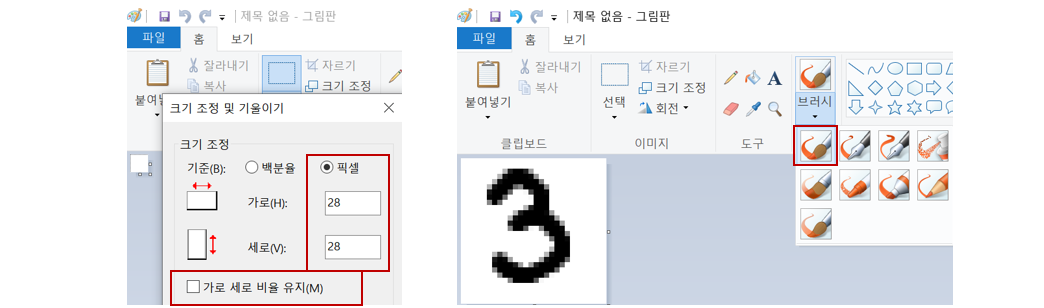

In [ ]:
from PIL import Image
Image.open("./image/3.png",)

In [ ]:
## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [ ]:
from keras.models import load_model
from keras.utils import np_utils
import matplotlib.pyplot as plt

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# .png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("./image/3.png").convert('L')
plt.imshow(img)
plt.show()

# # # 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# # # 데이터를 모델에 적용할 수 있도록 가공
test_data = ((img / 255.0) - 1) * -1


In [ ]:
test_data

In [ ]:
# 모델을 다시 읽어서 예측을 해보자

from tensorflow.keras.models import load_model
model = load_model('./model/MNIST손글씨_dnn_model.hdf5') 

result = model.predict(test_data)